In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.svm import LinearSVC

from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

import data_preprocessing as data_prep
from renameFeatures import rename_features, get_data_summary, get_data_summary2
from data_vizualization import metrics_plotting, metrics_plotting_with_events
import modelling

In [2]:
train_ = pd.read_csv("./full_joined_clean_data_3_7_daysTRAIN11.csv")
test_ = pd.read_csv("./full_joined_clean_data_3_7_daysTEST11.csv")

train_["event_id"] = train_["event_id"].astype(int)
train_["failure_target"] = train_["failure_target"].astype(int)
train_ = train_.drop("Unnamed: 0", axis=1)

test_["event_id"] = test_["event_id"].astype(int)
test_["failure_target"] = test_["failure_target"].astype(int)
test_ = test_.drop("Unnamed: 0", axis=1)

In [4]:
train_df = train_[(train_["event_id"] == 0)]
train_df = train_.dropna()

# test_df = test_[(test_["event_id"] == 0)]
test_df = test_.dropna()

In [5]:
importance = pd.read_csv("./feature_importance.csv")

In [6]:
train_df.shape, test_df.shape

((489739, 62), (71898, 62))

In [7]:
X_train, y_train = train_df.drop(["event_id", "failure_target", "time"], axis=1), train_df["failure_target"]
# X_val, y_val = df_val.drop(["event_id", "failure_target", "time"], axis=1), df_val["failure_target"]
X_test, y_test = test_df.drop(["event_id", "failure_target", "time"], axis=1), test_df["failure_target"]

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [9]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, shuffle=True)

In [10]:
y_train.mean(), y_test.mean()

(0.10202373100774086, 0.09199143230687919)

In [11]:
features_cols = X_train.columns
target_col = ["failure_target"]

In [12]:
smt = SMOTE(random_state=42)

In [13]:
X_res, y_res = smt.fit_resample(X_train, y_train.values.ravel())
y_res = pd.DataFrame(y_res, columns=target_col)
print(y_res.shape, X_res.shape)

# df_balanced = pd.concat([X_res, y_res], axis=1)
# # df_val = pd.concat([X_val, y_val], axis=1)
# df_test = pd.concat([X_test, y_test], axis=1)

# df_balanced = pd.concat([df_balanced, pd.get_dummies(df_balanced["well"], prefix="well_")], axis=1)
# # df_val = pd.concat([df_val, pd.get_dummies(df_val["well"], prefix="well_")], axis=1)
# df_test = pd.concat([df_test, pd.get_dummies(df_test["well"], prefix="well_")], axis=1)

(879548, 1) (879548, 59)


In [14]:
hello = pd.concat([X_res, y_res], axis=1)

In [15]:
hello.head()

,active_power,electricity_gage,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,pump_temperature,voltage_unbalance,current_unbalance,...,pump_temperature_rol_mean,pump_temperature_rol_std,pump_temperature_rol_max,pump_temperature_rol_min,pump_temperature_spk,Well__1,Well__4,Well__7,Well__8,failure_target
0,82.703800,2184.6,120.0,19.323126,16.986563,52.753124,74.345985,92.0,0.284233,2.349398,...,91.745636,0.323917,92.0,91.0,1.002773,1,0,0,0,0
1,82.702450,2184.6,120.0,19.323393,16.988840,52.749107,74.341515,92.0,0.284980,2.348878,...,91.745636,0.323917,92.0,91.0,1.002773,1,0,0,0,0
2,82.701120,2184.6,120.0,19.323660,16.991116,52.745090,74.337050,92.0,0.285720,2.348358,...,91.745636,0.323917,92.0,91.0,1.002773,1,0,0,0,0
3,82.699776,2184.6,120.0,19.323929,16.993393,52.741070,74.332590,92.0,0.286452,2.347838,...,91.745636,0.323917,92.0,91.0,1.002773,1,0,0,0,0
4,82.698440,2184.6,120.0,19.324196,16.995670,52.737053,74.328125,92.0,0.287214,2.347319,...,91.745636,0.323917,92.0,91.0,1.002773,1,0,0,0,0


Text(0, 0.5, 'Количество')

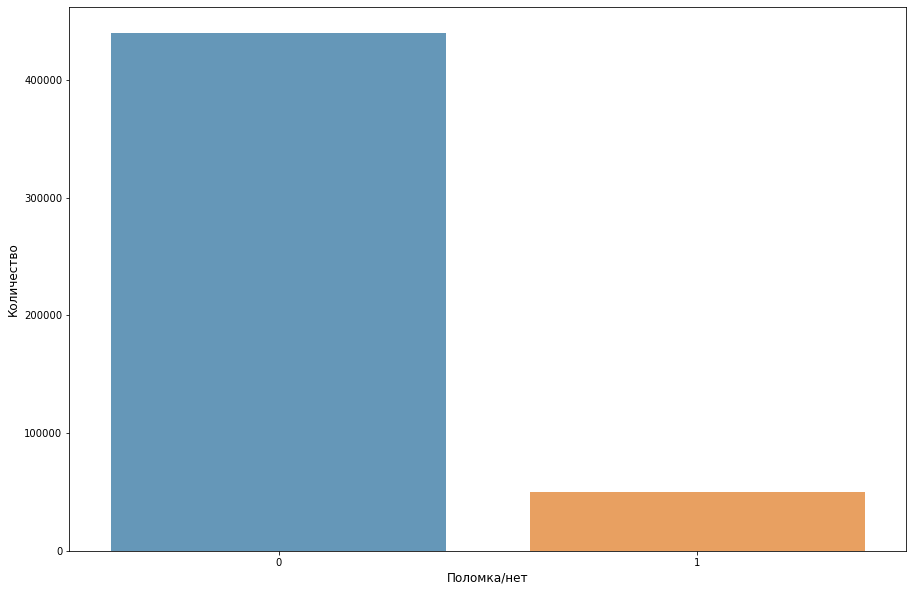

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x="failure_target", data=train_df, alpha=0.75)
plt.xlabel("Поломка/нет", fontdict={"size": 12})
plt.ylabel("Количество", fontdict={"size": 12})

In [550]:
cols_needed = importance.loc[importance["feature_importance"] != 0, "feature"].values

In [551]:
X_res = X_res[cols_needed]
X_test = X_test[cols_needed]

In [552]:
# rf = LogisticRegression(random_state=42, n_jobs=-1, penalty="l2")

In [553]:
# xgb0 = XGBClassifier(objective='binary:logistic', n_estimators=300, eval_metric="auc")

In [554]:

#  70 ROC AUC random_state=42, verbose=None, n_estimators=1000, learning_rate=0.01, reg_lambda=0.05, depth=6, eval_metric="AUC", subsample=0.5
# 73 ROC AUCrandom_state=42, verbose=None, n_estimators=2000, learning_rate=0.01, reg_lambda=0.05, depth=5, eval_metric="AUC", subsample=0.5


In [626]:
cat = CatBoostClassifier(
    random_state=42, verbose=None, n_estimators=1000, learning_rate=0.1, reg_lambda=0.1, depth=8, eval_metric="F1", subsample=0.5
    )

In [627]:
# def objective(trial):
#     params = {
#         "random_state":trial.suggest_categorical("random_state", [2022]),
#         'learning_rate' : trial.suggest_loguniform('learning_rate', 0.0001, 0.3),
#         'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
#         "n_estimators": 1000,
#         "max_depth":trial.suggest_int("max_depth", 4, 16),
#         'random_strength' :trial.suggest_int('random_strength', 0, 100),
#         "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#         "max_bin": trial.suggest_int("max_bin", 200, 500),
#         'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
#         'task_type': trial.suggest_categorical('task_type', ['GPU']),
#         'loss_function': trial.suggest_categorical('loss_function', ['MAE']),
#         'eval_metric': trial.suggest_categorical('eval_metric', ['MAE'])
#     }

In [628]:
cat.fit(X_res, y_res, verbose=100, eval_set=(X_test, y_test))

0:	learn: 0.9505251	test: 0.3159408	best: 0.3159408 (0)	total: 359ms	remaining: 5m 58s
100:	learn: 0.9999470	test: 0.1606111	best: 0.3159408 (0)	total: 26.8s	remaining: 3m 58s
200:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 49.5s	remaining: 3m 16s
300:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 1m 12s	remaining: 2m 48s
400:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 1m 37s	remaining: 2m 25s
500:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 2m 3s	remaining: 2m 2s
600:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 2m 32s	remaining: 1m 41s
700:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 3m 20s	remaining: 1m 25s
800:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 3m 53s	remaining: 58.1s
900:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 4m 25s	remaining: 29.2s
999:	learn: 0.9999676	test: 0.1528674	best: 0.3159408 (0)	total: 5m 1s	remaining: 0us

bestTest = 0.315940838

In [629]:
test_preds = cat.predict(X_test)
train_preds = cat.predict(X_res)
# val_preds = rf.predict(X_val)

In [630]:
# test_preds = test_preds > 0.9

In [631]:
test_proba = cat.predict_proba(X_test)

In [621]:
proba = test_proba[:, 1] >= 0.15

In [622]:
metrics.roc_auc_score(y_test, test_proba[:, 1])

0.54228194534771

In [623]:
modelling.evaluate_results(y_test, proba)

Precision --- 0.15688767401945203
Recall --- 1.0
ROC_AUC --- 0.5


In [624]:
modelling.evaluate_results(y_test, test_preds)

Precision --- 0.3200499427739049
Recall --- 0.31158833063209074
ROC_AUC --- 0.5942036503495974


In [625]:
modelling.evaluate_results(y_res, train_preds)

Precision --- 0.913715082848491
Recall --- 0.9872179670707499
ROC_AUC --- 0.9469959735839428


In [566]:
viz_data = test_.copy()

In [171]:
viz_data.shape, test_df.shape

((71899, 63), (71898, 63))

In [172]:
train = X_res.copy()
train["target"] = y_res

In [173]:
# train.to_csv("./TOTAL_train.csv")
# test_df.to_csv("./TOTAL_test.csv")

In [174]:
metrics.confusion_matrix(y_test, proba)

array([[52845, 12439],
       [ 1858,  4756]], dtype=int64)

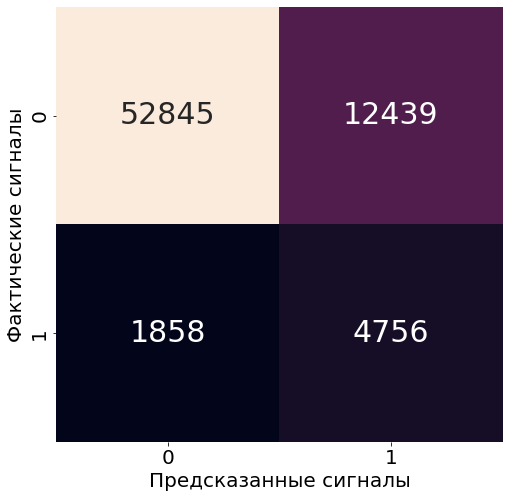

In [175]:
plt.figure(figsize=(8, 8))
sns.heatmap(metrics.confusion_matrix(y_test, proba), annot=True, fmt=".0f", annot_kws={"size": 30}, cbar=False)
plt.ylabel("Фактические сигналы", fontdict={"size": 20})
plt.xlabel("Предсказанные сигналы", fontdict={"size": 20})
ax = plt.gca()
ax.tick_params(labelsize=20)

In [177]:
test_df["predicted"] = proba

In [178]:
viz_data["time"] = test_["time"]
viz_data["failure_target"] = test_["failure_target"]
viz_data["event_id"] = test_["event_id"]

In [179]:
probs = test_proba

In [180]:
proba.shape, test_df.shape

((71898,), (71898, 64))

In [181]:
importance2 = pd.DataFrame({"feature": X_res.columns, "feature_importance": cat.feature_importances_}).sort_values(by="feature_importance", ascending=False)

In [633]:
importance.to_clipboard()

In [183]:
test_df["time"] = pd.to_datetime(test_df["time"])

In [184]:
# test_df.to_csv("./test_answers.csv")

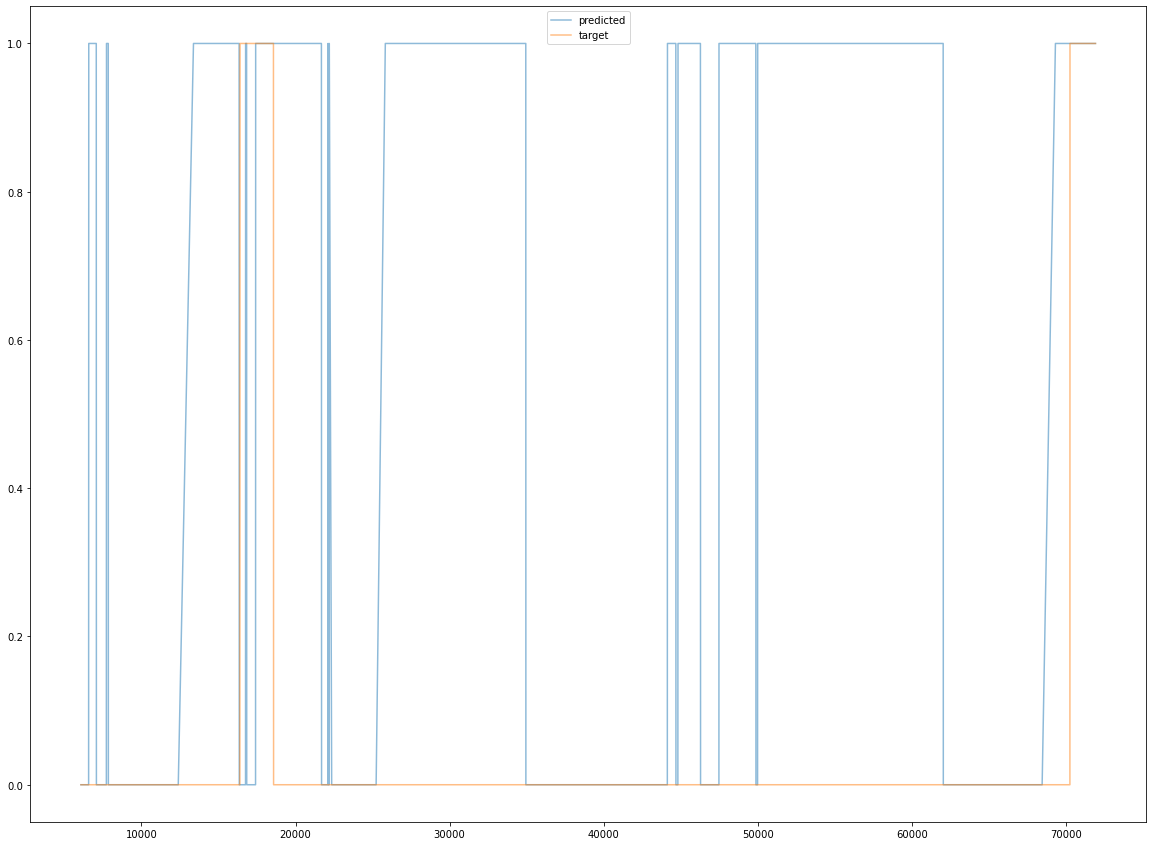

In [185]:
plt.figure(figsize=(20, 15))
plt.plot(test_df[test_df["Well__1"] == 1]["predicted"], alpha=0.5, label="predicted")
plt.plot(test_df[test_df["Well__1"] == 1]["failure_target"], alpha=0.5, label="target")
plt.legend()

<AxesSubplot:>

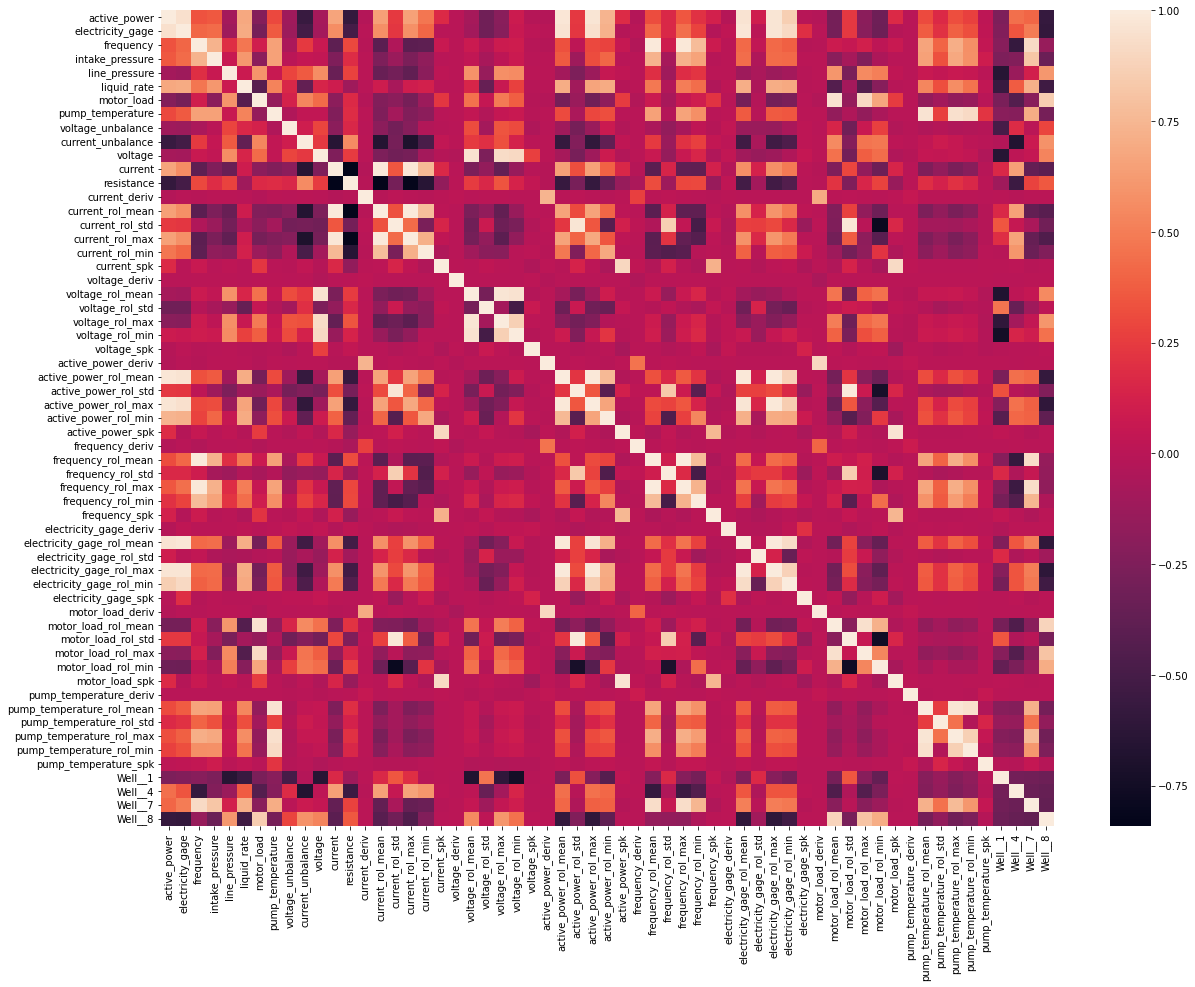

In [44]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train.corr())

In [20]:
results = pd.read_csv("./test_answers.csv", parse_dates=["time"])
results = results.drop("Unnamed: 0", axis=1)

In [21]:
results = results.reset_index(drop=True)

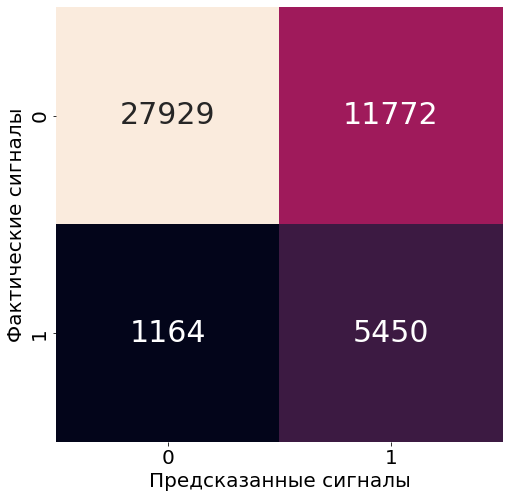

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(metrics.confusion_matrix(results["failure_target"], results["predicted"]), annot=True, fmt=".0f", annot_kws={"size": 30}, cbar=False)
plt.ylabel("Фактические сигналы", fontdict={"size": 20})
plt.xlabel("Предсказанные сигналы", fontdict={"size": 20})
ax = plt.gca()
ax.tick_params(labelsize=20)

In [23]:
modelling.evaluate_results(results["failure_target"], results["predicted"])

Precision --- 0.31645569620253167
Recall --- 0.8240096764439069
ROC_AUC --- 0.7637466079506756


In [24]:
results["time"] = pd.to_datetime(results["time"])

In [25]:
well_data_1 = results[results["Well__1"] == 1]
well_data_4 = results[results["Well__4"] == 1]
well_data_7 = results[results["Well__7"] == 1]
well_data_8 = results[results["Well__8"] == 1]

In [26]:
date_range_1 = pd.date_range(well_data_1["time"].min(), well_data_1["time"].max(), freq="2Min").to_series()
date_range_4 = pd.date_range(well_data_4["time"].min(), well_data_4["time"].max(), freq="2Min").to_series()
date_range_7 = pd.date_range(well_data_7["time"].min(), well_data_7["time"].max(), freq="2Min").to_series()
date_range_8 = pd.date_range(well_data_8["time"].min(), well_data_8["time"].max(), freq="2Min").to_series()

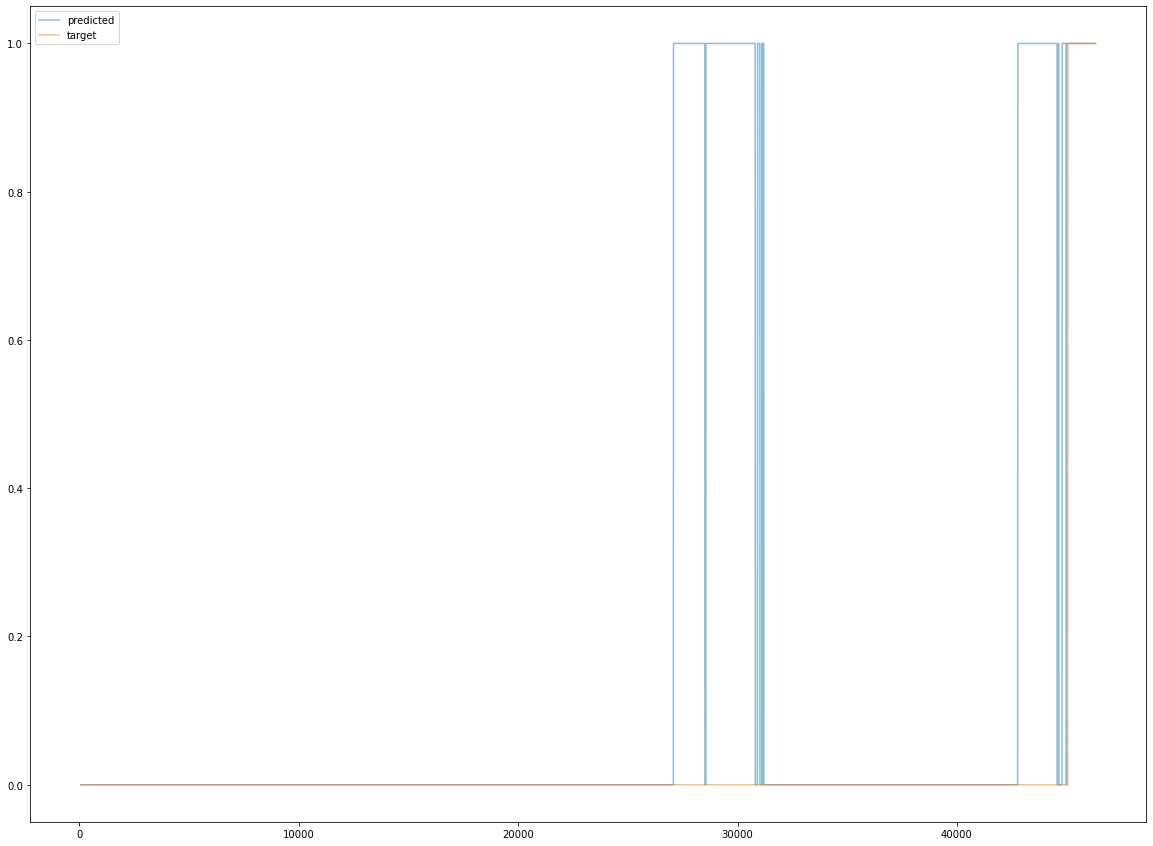

In [27]:
plt.figure(figsize=(20, 15))
plt.plot(well_data_8["predicted"], alpha=0.5, label="predicted")
plt.plot(well_data_8["failure_target"], alpha=0.5, label="target")
plt.legend()

In [28]:
test = pd.read_csv("./full_joined_clean_data_3_7_daysTEST11.csv", parse_dates=["time"])
test = test.drop("Unnamed: 0", axis=1)

In [29]:
test_ = test.select_dtypes(exclude="float64")
test_["current"] = test["current"]

In [30]:
test_1 = test_[test_["Well__1"] == 1]
test_4 = test_[test_["Well__4"] == 1]
test_7 = test_[test_["Well__7"] == 1]
test_8 = test_[test_["Well__8"] == 1]

In [31]:
test_1.shape

(16820, 8)

In [32]:
test_1 = test_1.merge(well_data_1[["time", "predicted"]], on="time", how="left")
test_4 = test_4.merge(well_data_4[["time", "predicted"]], on="time", how="left")
test_7 = test_7.merge(well_data_7[["time", "predicted"]], on="time", how="left")
test_8 = test_8.merge(well_data_8[["time", "predicted"]], on="time", how="left")

In [33]:
test_1["predicted"] = test_1["predicted"].fillna(0)
test_4["predicted"] = test_4["predicted"].fillna(0)
test_7["predicted"] = test_7["predicted"].fillna(0)
test_8["predicted"] = test_8["predicted"].fillna(0)

In [34]:
test.head()

,active_power,electricity_gage,event_id,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,pump_temperature,time,...,pump_temperature_rol_mean,pump_temperature_rol_std,pump_temperature_rol_max,pump_temperature_rol_min,pump_temperature_spk,failure_target,Well__1,Well__4,Well__7,Well__8
0,72.010030,1765.09,0,95.11465,27.859285,20.529285,104.4,54.800000,96.0,2021-05-01 00:00:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
1,72.058550,1765.09,0,95.09646,27.855715,20.525715,104.4,54.830770,96.0,2021-05-01 00:02:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
2,72.103340,1765.09,0,95.08068,27.852142,20.522142,104.4,54.858974,96.0,2021-05-01 00:04:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
3,72.144424,1765.09,0,95.06731,27.848572,20.518572,104.4,54.884617,96.0,2021-05-01 00:06:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
4,72.181786,1765.09,0,95.05635,27.845000,20.515000,104.4,54.907692,96.0,2021-05-01 00:08:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0


In [35]:
forecast_window = 14

In [43]:
test["cum_signal"] = test["predicted"].rolling(min_periods=1, window=forecast_window).sum()

KeyError: 'predicted'

In [38]:
test.head()

,active_power,electricity_gage,event_id,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,pump_temperature,time,...,pump_temperature_rol_mean,pump_temperature_rol_std,pump_temperature_rol_max,pump_temperature_rol_min,pump_temperature_spk,failure_target,Well__1,Well__4,Well__7,Well__8
0,72.010030,1765.09,0,95.11465,27.859285,20.529285,104.4,54.800000,96.0,2021-05-01 00:00:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
1,72.058550,1765.09,0,95.09646,27.855715,20.525715,104.4,54.830770,96.0,2021-05-01 00:02:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
2,72.103340,1765.09,0,95.08068,27.852142,20.522142,104.4,54.858974,96.0,2021-05-01 00:04:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
3,72.144424,1765.09,0,95.06731,27.848572,20.518572,104.4,54.884617,96.0,2021-05-01 00:06:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0
4,72.181786,1765.09,0,95.05635,27.845000,20.515000,104.4,54.907692,96.0,2021-05-01 00:08:00,...,95.81409,0.40406,97.0,95.0,1.00194,0,0,1,0,0


In [40]:
plt.figure(figsize=(20, 15))
plt.plot(test["time"], test["predicted"], alpha=0.5, label="predicted")
plt.plot(test["time"], test["failure_target"], alpha=0.5, label="target")
plt.legend()

In [41]:
xx = test.copy()

In [42]:
xx["Y_FAIL_sumxx"] = 0
xx["Y_FAIL_sumxx"] =(xx["predicted"].rolling(min_periods=1, window=(forecast_window)).sum())

KeyError: 'predicted'

In [ ]:
xx.head()

,event_id,time,failure_target,Well__1,Well__4,Well__7,Well__8,current,predicted,failure_date,signal_date,fail_range,time_to_failure,C,WARNING,cum_signal,Y_FAIL_sumxx,Y_FAILZ,SIGNAL_ID
0,266,2021-05-04 05:20:00,0,1,0,0,0,25.086891,0,2021-05-04 05:20:00,2021-05-09 04:34:00,0 days,0.0,-5 days +00:46:00,-4.968056,0.0,0.0,0,0
1,266,2021-05-04 05:22:00,0,1,0,0,0,25.086280,0,2021-05-04 05:22:00,2021-05-09 04:34:00,0 days,0.0,-5 days +00:48:00,-4.966667,0.0,0.0,0,0
2,266,2021-05-04 05:24:00,0,1,0,0,0,25.085670,0,2021-05-04 05:24:00,2021-05-09 04:34:00,0 days,0.0,-5 days +00:50:00,-4.965278,0.0,0.0,0,0
3,266,2021-05-04 05:26:00,0,1,0,0,0,25.085060,0,2021-05-04 05:26:00,2021-05-09 04:34:00,0 days,0.0,-5 days +00:52:00,-4.963889,0.0,0.0,0,0
4,266,2021-05-04 05:28:00,0,1,0,0,0,25.084452,0,2021-05-04 05:28:00,2021-05-09 04:34:00,0 days,0.0,-5 days +00:54:00,-4.962500,0.0,0.0,0,0


In [ ]:
# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.predicted)

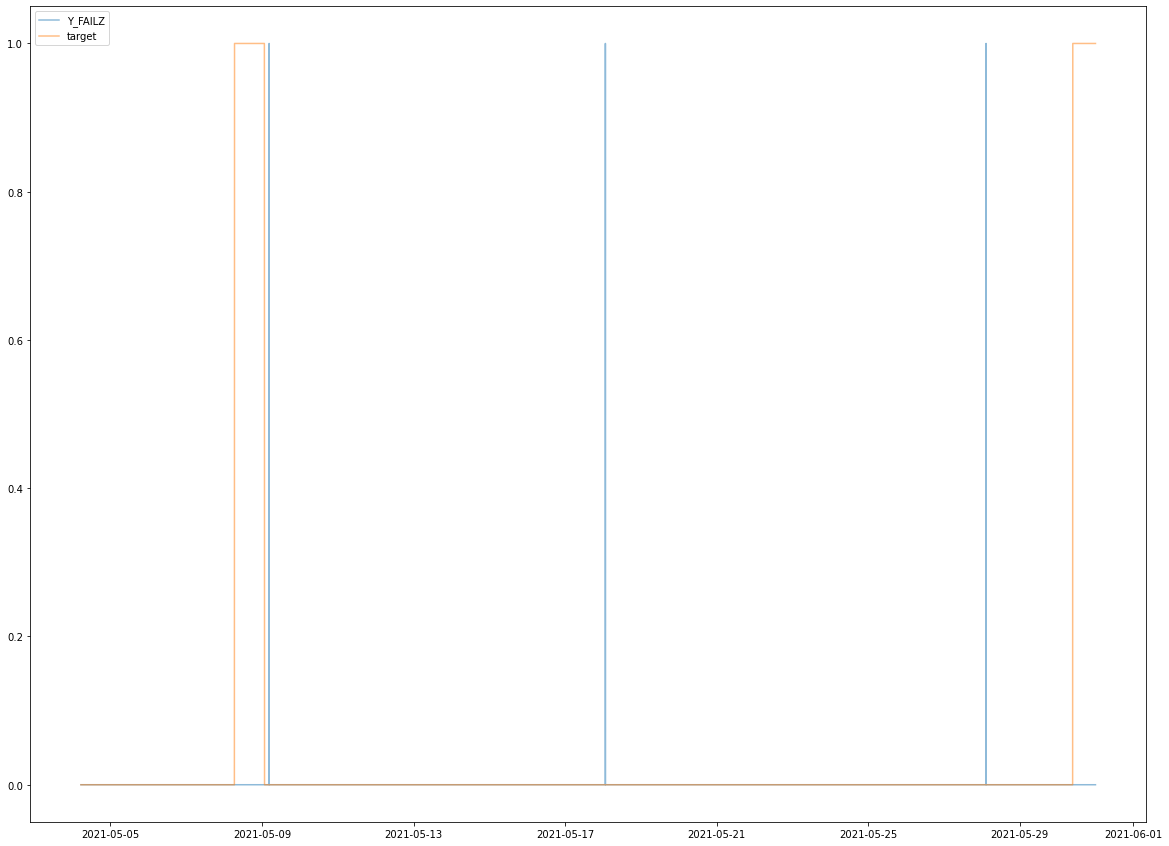

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(xx["time"], xx["Y_FAILZ"], alpha=0.5, label="Y_FAILZ")
plt.plot(xx["time"], xx["failure_target"], alpha=0.5, label="target")
plt.legend()

In [ ]:
#sort the data by id and date.
xx=xx.sort_values(by=["time"], ascending=[True])
#create signal id with the cumsum function.
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()

In [ ]:
df_signals=xx[xx['Y_FAILZ'] == 1].copy()
df_signal_date=df_signals[['SIGNAL_ID','time']].copy()
df_signal_date=df_signal_date.rename(index=str, columns={"time": "SIGNAL_DATE"})
# df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})

In [ ]:
df_signal_date.shape

(3, 2)

In [ ]:
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')

In [ ]:
xx['C'] = xx['failure_date'] - xx['SIGNAL_DATE']
xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')

In [ ]:
# define a true positive
xx['TRUE_POSITIVE'] = np.where(((xx.event_id != 0) & (xx.WARNING<=forecast_window) & (xx.WARNING>=0)), 1, 0)
# define a false negative
xx['FALSE_NEGATIVE'] = np.where((xx.TRUE_POSITIVE==0) & (xx.event_id != 0), 1, 0)
# define a false positive
xx['BAD_S']=np.where((xx.WARNING<0) | (xx.WARNING>=forecast_window), 1, 0)
xx['FALSE_POSITIVE'] = np.where(((xx.Y_FAILZ == 1) & (xx.BAD_S==1)), 1, 0)
xx['bootie']=1
xx['CATEGORY']=np.where((xx.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((xx.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((xx.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))
table = pd.pivot_table(xx, values=['bootie'],columns=['CATEGORY'], aggfunc=np.sum)
table

CATEGORY,FALSE_NEGATIVE,TRUE_NEGATIVE,TRUE_POSITIVE
bootie,2546,9890,4384


In [ ]:
xx["true_failure"] = xx["event_id"] != 0

In [ ]:
xx.head()

,event_id,time,failure_target,Well__1,Well__4,Well__7,Well__8,current,predicted,failure_date,...,SIGNAL_DATE,TRUE_POSITIVE,FALSE_NEGATIVE,BAD_S,FALSE_POSITIVE,bootie,CATEGORY,actual_failure,FACT_FAIL_sumxx,true_failure
0,266,2021-05-04 05:20:00,0,1,0,0,0,25.086891,0,2021-05-04 05:20:00,...,NaT,0,1,0,0,1,FALSE_NEGATIVE,True,1.0,True
1,266,2021-05-04 05:22:00,0,1,0,0,0,25.086280,0,2021-05-04 05:22:00,...,NaT,0,1,0,0,1,FALSE_NEGATIVE,True,2.0,True
2,266,2021-05-04 05:24:00,0,1,0,0,0,25.085670,0,2021-05-04 05:24:00,...,NaT,0,1,0,0,1,FALSE_NEGATIVE,True,3.0,True
3,266,2021-05-04 05:26:00,0,1,0,0,0,25.085060,0,2021-05-04 05:26:00,...,NaT,0,1,0,0,1,FALSE_NEGATIVE,True,4.0,True
4,266,2021-05-04 05:28:00,0,1,0,0,0,25.084452,0,2021-05-04 05:28:00,...,NaT,0,1,0,0,1,FALSE_NEGATIVE,True,5.0,True


In [ ]:
xx["FACT_FAIL_sumxx"] = 0
xx["FACT_FAIL_sumxx"] =(xx["true_failure"].rolling(min_periods=1, window=14).sum())

In [ ]:
# if a signal has occured in the last 90 days, the signal is 0.
xx['actual_failure']=np.where((xx.FACT_FAIL_sumxx>1), 0, xx.true_failure)

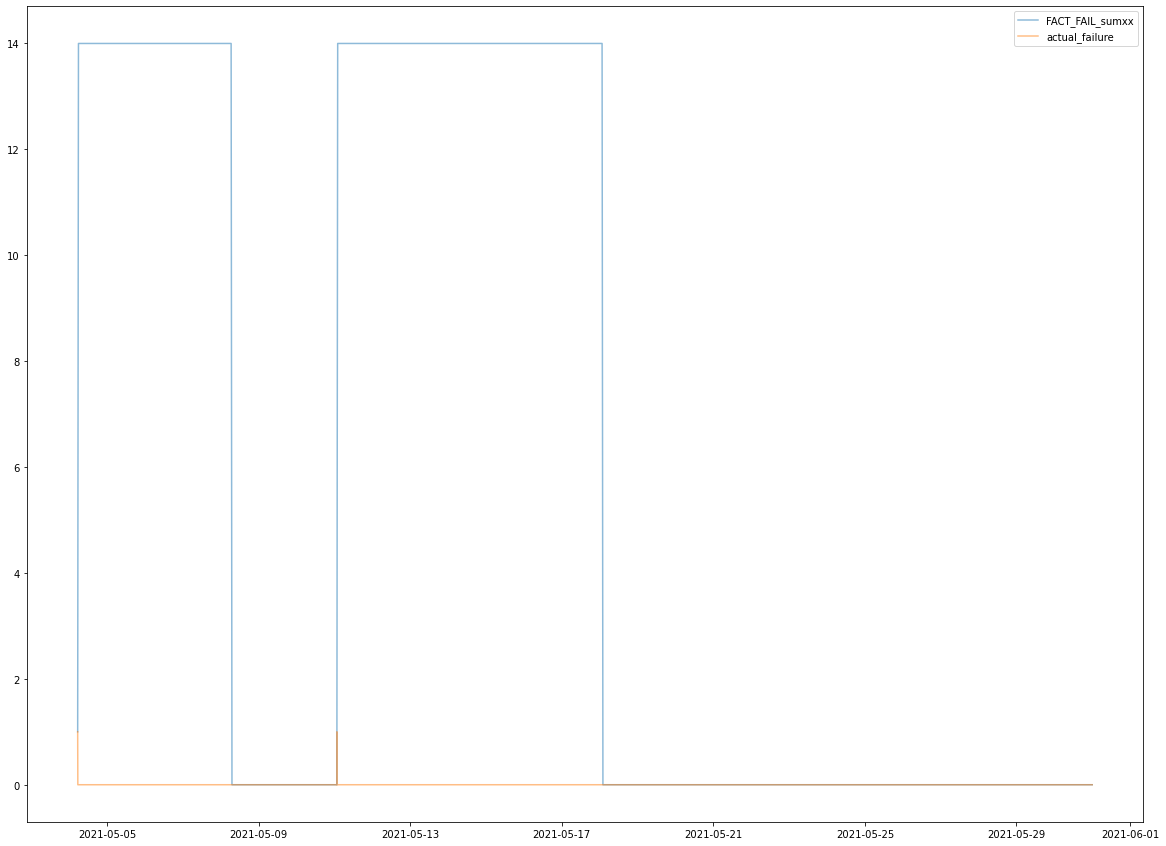

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(xx["time"], xx["FACT_FAIL_sumxx"], alpha=0.5, label="FACT_FAIL_sumxx")
plt.plot(xx["time"], xx["actual_failure"], alpha=0.5, label="actual_failure")
plt.legend()

In [ ]:
# define a true positive
xx['TRUE_POSITIVE_2'] = np.where(((xx.actual_failure == 1) & (xx.WARNING<=forecast_window) & (xx.WARNING>=0)), 1, 0)
# define a false negative
xx['FALSE_NEGATIVE_2'] = np.where((xx.TRUE_POSITIVE_2==0) & (xx.actual_failure==1), 1, 0)
# define a false positive
xx['BAD_S_2']=np.where((xx.WARNING<0) | (xx.WARNING>=forecast_window), 1, 0)
xx['FALSE_POSITIVE_2'] = np.where(((xx.Y_FAILZ == 1) & (xx.BAD_S_2==1)), 1, 0)
xx['bootie_2']=1
xx['CATEGORY_2']=np.where((xx.FALSE_POSITIVE_2==1),'FALSE_POSITIVE_2',
                                      (np.where((xx.FALSE_NEGATIVE_2==1),'FALSE_NEGATIVE_2',
                                                (np.where((xx.TRUE_POSITIVE_2==1),'TRUE_POSITIVE_2','TRUE_NEGATIVE_2')))))
table = pd.pivot_table(xx, values=['bootie_2'],columns=['CATEGORY_2'], aggfunc=np.sum)
table
table

CATEGORY_2,FALSE_NEGATIVE_2,TRUE_NEGATIVE_2,TRUE_POSITIVE_2
bootie_2,1,16818,1


In [ ]:
raz, data_raz = modelling.evaluate_results2(test_1, forecast_window=14)

In [ ]:
raz

CATEGORY,FALSE_NEGATIVE,TRUE_NEGATIVE,TRUE_POSITIVE
bootie,1,16818,1


In [ ]:
dva, data_dva = modelling.evaluate_results2(test_4, forecast_window=14)

In [ ]:
dva

CATEGORY,FALSE_NEGATIVE,TRUE_NEGATIVE,TRUE_POSITIVE
bootie,1,18810,2


In [ ]:
tri, data_tri = modelling.evaluate_results2(test_7, forecast_window=14)

In [ ]:
tri

CATEGORY,TRUE_NEGATIVE,TRUE_POSITIVE
bootie,16196,1


In [ ]:
chetire, data_chetire = modelling.evaluate_results2(test_8, forecast_window=14)

In [ ]:
chetire

CATEGORY,TRUE_NEGATIVE
bootie,20069


In [ ]:
a = np.array([[71893, 0], [2, 4]])

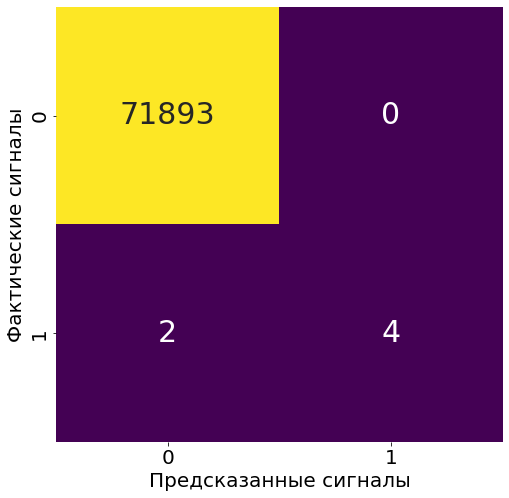

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(a, annot=True, fmt=".0f", annot_kws={"size": 30}, cbar=False, cmap="viridis")
plt.ylabel("Фактические сигналы", fontdict={"size": 20})
plt.xlabel("Предсказанные сигналы", fontdict={"size": 20})
ax = plt.gca()
ax.tick_params(labelsize=20)

In [ ]:
test_1

,event_id,time,failure_target,Well__1,Well__4,Well__7,Well__8,current,predicted
0,266,2021-05-04 05:20:00,0,1,0,0,0,25.086891,0
1,266,2021-05-04 05:22:00,0,1,0,0,0,25.086280,0
2,266,2021-05-04 05:24:00,0,1,0,0,0,25.085670,0
3,266,2021-05-04 05:26:00,0,1,0,0,0,25.085060,0
4,266,2021-05-04 05:28:00,0,1,0,0,0,25.084452,0
...,...,...,...,...,...,...,...,...,...
16815,0,2021-05-30 23:50:00,1,1,0,0,0,24.524433,True
16816,0,2021-05-30 23:52:00,1,1,0,0,0,24.526215,True
16817,0,2021-05-30 23:54:00,1,1,0,0,0,24.528107,True
16818,0,2021-05-30 23:56:00,1,1,0,0,0,24.530110,True


In [ ]:
all_results = pd.concat([raz, dva, tri, chetire])

In [ ]:
all_results["CATEGORY"] = ["Well #1", "Well #2", "Well #3", "Well #4",]

In [ ]:
signal_dates = data_raz.dropna()["SIGNAL_DATE"].unique()

In [ ]:
failure_dates = data_raz.dropna()["failure_date"].unique()

In [ ]:
data_raz[data_raz["actual_failure"] == 1]["time"].values

array(['2021-05-04T05:20:00.000000000', '2021-05-11T01:32:00.000000000'],
      dtype='datetime64[ns]')

Text(0, 0.5, 'СИЛА ТОКА, A')

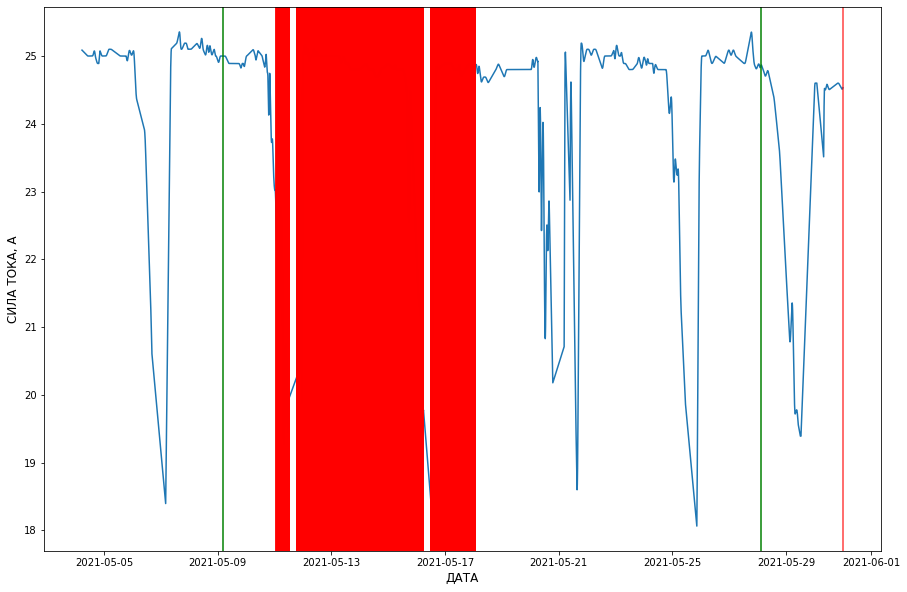

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data_raz["time"], data_raz["current"], label="Current")

for signal_date in signal_dates:
    plt.axvline(signal_date, 0 , data_raz["current"].max(), c="g", label="SIGNAL")

for failure_date in failure_dates:
    plt.axvline(failure_date, 0 , data_raz["current"].max(), c="r", label="FAILURE", alpha=0.75)

# plt.legend()
plt.xlabel("ДАТА", fontdict={"size": 12})
plt.ylabel("СИЛА ТОКА, A", fontdict={"size": 12})


In [ ]:
data_raz.columns

Index(['event_id', 'time', 'failure_target', 'Well__1', 'Well__4', 'Well__7',
       'Well__8', 'current', 'predicted', 'failure_date', 'Y_FAIL_sumxx',
       'Y_FAILZ', 'SIGNAL_ID', 'SIGNAL_DATE', 'C', 'WARNING', 'true_failure',
       'FACT_FAIL_sumxx', 'actual_failure', 'TRUE_POSITIVE', 'FALSE_NEGATIVE',
       'BAD_S', 'FALSE_POSITIVE', 'bootie', 'CATEGORY'],
      dtype='object')

In [ ]:
all_data = [data_raz, data_dva, data_tri, data_chetire]

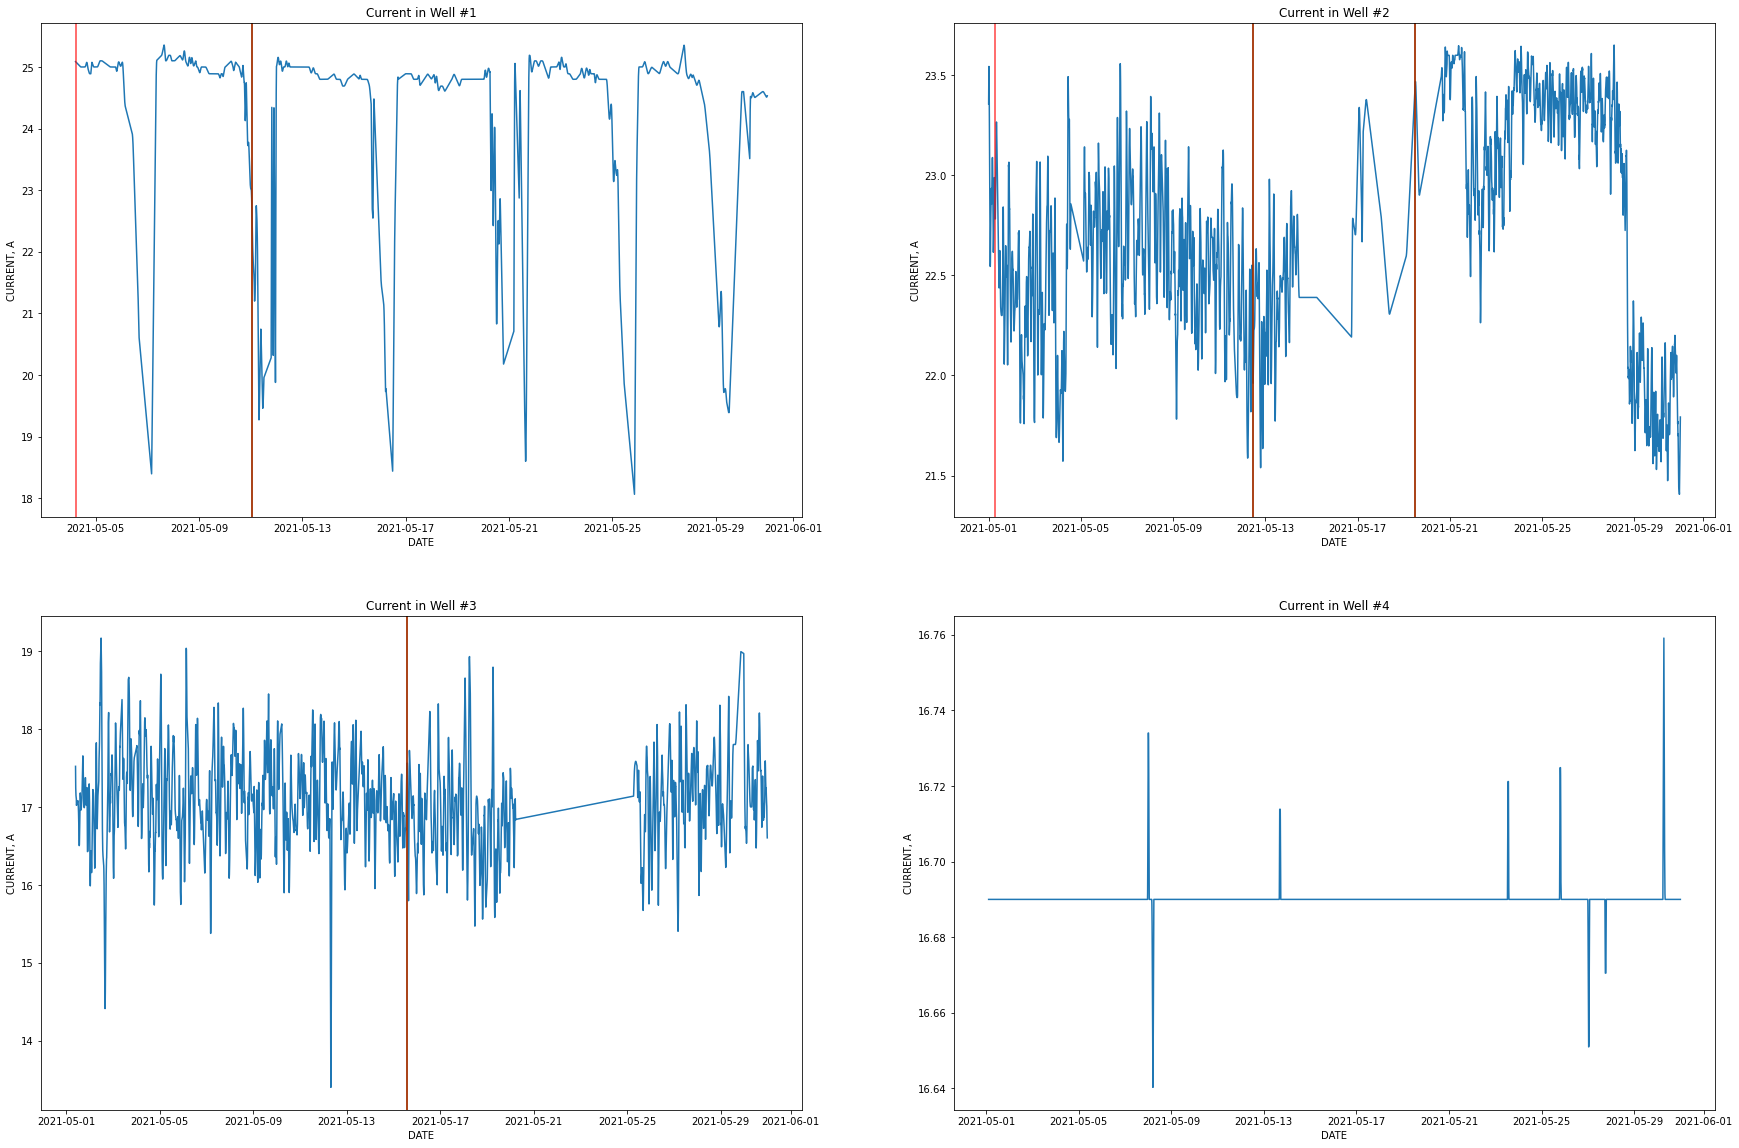

In [ ]:
modelling.plot_signals(all_data)

In [ ]:
concat_data = pd.concat([data_raz, data_dva, data_tri, data_chetire], axis=0)

In [ ]:
concat_data[concat_data["TRUE_POSITIVE"] == 1][["time", "SIGNAL_DATE", "failure_date"]]

,time,SIGNAL_DATE,failure_date
4418,2021-05-11 01:32:00,2021-05-09 04:34:00,2021-05-11 01:32:00
7627,2021-05-12 11:02:00,2021-05-10 12:34:00,2021-05-12 11:02:00
11517,2021-05-19 11:32:00,2021-05-10 12:34:00,2021-05-19 11:32:00
9467,2021-05-15 13:32:00,2021-05-14 10:20:00,2021-05-15 13:32:00


In [ ]:
concat_data.columns

Index(['event_id', 'time', 'failure_target', 'Well__1', 'Well__4', 'Well__7',
       'Well__8', 'current', 'predicted', 'failure_date', 'Y_FAIL_sumxx',
       'Y_FAILZ', 'SIGNAL_ID', 'SIGNAL_DATE', 'C', 'WARNING', 'true_failure',
       'FACT_FAIL_sumxx', 'actual_failure', 'TRUE_POSITIVE', 'FALSE_NEGATIVE',
       'BAD_S', 'FALSE_POSITIVE', 'bootie', 'CATEGORY'],
      dtype='object')